In [18]:
pwd

'c:\\Users\\ppapa\\OneDrive\\Υπολογιστής\\MSC\\semester B\\Python\\lecture8'

# Lecture 07B: Intro to Visualization with static plots.

Plots, figures, charts, graphs are terms used interchangeably.  

## 1. Informative and beautiful plots.
* Know your data and the proper graphs. [Awesome guide!](https://www.data-to-viz.com/)  
Select the right graph for the task.  

* Aspect ratio = "width-to-height" ratio of plot size. Used to inform and to mislead.  
16:9 is the standard in video.  
In plots, it can be 5:4, 4:3, and usually is 16:10 so in pixels it is 800 width/500 height.  
Not the same for all devices, depending on screen size (mobile VS Desktop VS Laptops).  

* Plot size (in absolute pixels) affects speed (similar to images).

* Scale of axes matters as well.   
Remember: The shadow is not the same as the phenomenon (Plato's cave and butterflies on the wall).   

* Understand how to maximize the ["data-ink ratio"](https://www.darkhorseanalytics.com/blog/data-looks-better-naked), always ["declutter".](https://www.data-to-viz.com/caveat/declutter.html)   

* Understand the ["proportional ink" principle.](https://clauswilke.com/dataviz/proportional-ink.html)

* Usefool online [book.](https://clauswilke.com/dataviz/)  

* Data management, cleaning before/while plotting.   

* Chose the significant dimensions (features) to display. More dimensions is not necessarily better.

* Colours [matter a lot!](https://blog.datawrapper.de/colors/) Printed paper "color spaces" are different from monitor ones.   
[954 most used colors on monitors](https://xkcd.com/color/rgb/) and [top 50 in the survey.](https://blog.xkcd.com/2010/05/03/color-survey-results/)   
Colours tutorials by: [seaborn,](https://seaborn.pydata.org/tutorial/color_palettes.html) [matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colors.html)  
Color Brewer, a must read for [colours.](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)  
[RGBA model](https://en.wikipedia.org/wiki/RGBA_color_model) colors.   
[Aesthetics](http://seaborn.pydata.org/tutorial/aesthetics.html) matter, colours may be in discord, like Cacofonix.  

* Known [plotting caveats](https://www.data-to-viz.com/caveats.html).   
Many suboptimal practices [everywhere, even in official docs.](https://matplotlib.org/3.1.0/gallery/showcase/bachelors_degrees_by_gender.html)     
Not all problems are related to plots.       
[Plots to avoid.](https://genomicsclass.github.io/book/pages/plots_to_avoid.html)  

## 2. The limitations of "summary metrics"

* Plots convey meaningful information.  
> Exploratory Data Analysis [(EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)   
> [Descriptive Stats](https://en.wikipedia.org/wiki/Descriptive_statistics)  
> [Inferencial Stats](https://en.wikipedia.org/wiki/Statistical_inference)  
> [Predicitive Analytics.](https://en.wikipedia.org/wiki/Predictive_analytics)   

* [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), Try the [example](https://seaborn.pydata.org/examples/anscombes_quartet.html) in seaborn.  

In [19]:
# Alwyas import the necessary modules at the first part of the code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet from seaborn.
df = sns.load_dataset("anscombe")
df.sample(6)

,dataset,x,y
26,III,11.0,7.81
23,III,8.0,6.77
2,I,13.0,7.58
6,I,6.0,7.24
31,III,7.0,6.42
32,III,5.0,5.73


In [21]:
df.groupby("dataset").sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


In [22]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [23]:
df['observation'] = df.groupby('dataset')['dataset'].cumcount()

pivot_df = (
    df.set_index(['observation','dataset'])
            .stack().unstack([1,2])
            .rename_axis(None)
            .rename_axis(('dataset','observation'), axis=1)
           )  # Use parenthesis for line breaks and commenting out arguments.

pivot_df  #The x values are the same for the first three datasets

dataset         I           II         III           IV       
observation     x      y     x     y     x      y     x      y
0            10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1             8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2            13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3             9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4            11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5            14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6             6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7             4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8            12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9             7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10            5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

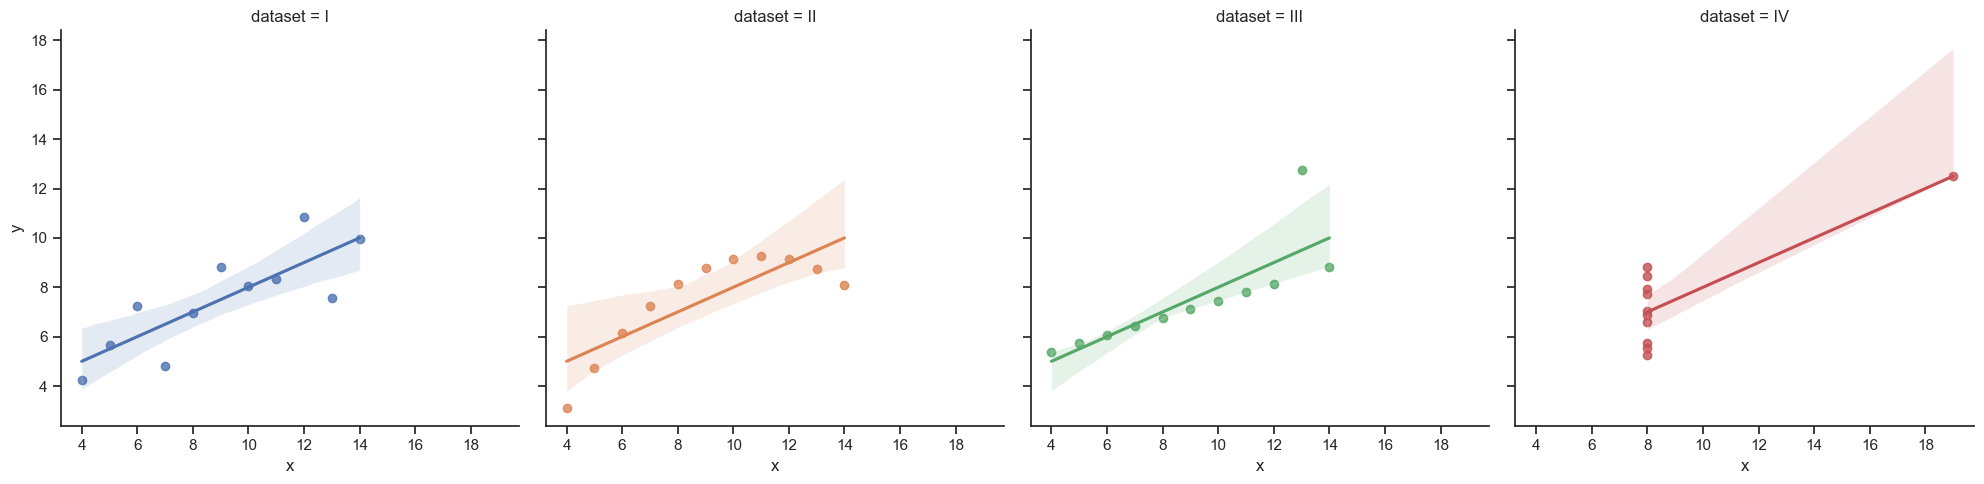

In [24]:
# Show the results of a linear regression model for each dataset.
sns.lmplot(data=df,
           x="x",
           y="y",
           col="dataset",
           hue="dataset");

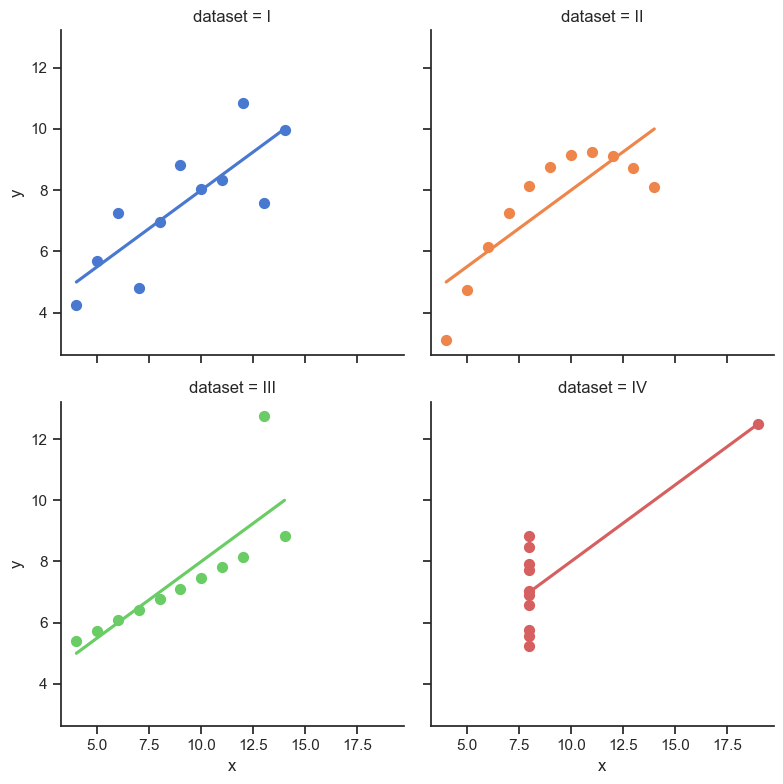

In [25]:
# Some customizations
sns.lmplot(
    data=df,
    x="x",
    y="y",
    col="dataset",
    hue="dataset",
    col_wrap=2, 
    palette="muted",
    ci=None,
    height=4,
    scatter_kws={"s": 50, "alpha": 1});

In [26]:
# sns.lmplot?

## 3. The python visualization ecosystem

* The python [visualization ecosystem](https://pyviz.org/) is huge and growing fast.    
* Matplotlib is the high level API most advanced python libraries use.

* [Plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) VS [table visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Table-Visualization).     

* Plotting with [pandas](https://pandas.pydata.org/docs/user_guide/visualization.html), [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/).  

* Ready-made styling libraries examples:   
[dufte](https://github.com/nschloe/dufte),   
[cyberpunk](https://github.com/dhaitz/mplcyberpunk),   
[science plots](https://github.com/garrettj403/SciencePlots)

* Ready-made Web Apps Visualization libraries:
    * Streamlit
    * Taipy
    * Voila

* Auto-EDA or low code:
    * PyGwalker
    * McKinsey `Vizro` (https://github.com/mckinsey/vizro)
      

* Syntax:  
library.function(arguments)  
df.function(arguments)  
figure.function(arguments)  
figure_object.function(arguments)

### Most difficult issues in ploting:  
* Parameter names.  
* Different modules and plots have different syntax, different function names, diffent goals.  
* Order of methods and parameters matters a lot, because the last settings override other previous settings.  
* Common parameter names are used by the specific figure object, or by the "high level" API library, or by both, but may need different datatypes as inputs. Imhv, the most confusing, error-prone issue.

#### Reminder: Some commands to help you navigate between directories.
```pwd```  # Command to show Present Working Directory.  
```cd ..```   # Command to change directory and go one folder "up".   
```cd ..\..```   # Command to change directory and go two folders "up".     
```cd name_of_directory```  # Command to go to a directory "below" which is called: "name_of_directory".   

In [27]:
pwd

'c:\\Users\\ppapa\\OneDrive\\Υπολογιστής\\MSC\\semester B\\Python\\lecture8'

You may uncomment the lines below to try the commands and practice your skills in finding your way around in your PC folders labyrinth. But  when you do, your present working directory will change.

In [28]:
# cd ..

In [29]:
# cd ..\..

## 4. Kaggle example. Import necessary modules and data

In [30]:
# Change display format in all notebook, to suppress scientific notation format.
# pd.set_option('display.float_format', '{:.2f}'.format)

### Read data file as dataframe

In [31]:
pwd

'c:\\Users\\ppapa\\OneDrive\\Υπολογιστής\\MSC\\semester B\\Python\\lecture8'

In [32]:
# My relative path.
df = pd.read_csv(
   "../datasets/kaggle_survey_2020_responses.csv",  # this is the path in which I have my file.
    # "kaggle_survey_2020_responses.csv", # If you have the csv file in the same dir
   usecols=[0, 1, 2, 3, 4, 5, 6, 118], low_memory=False)

#### If your data file is in the same folder as the notebook =>  
*Uncomment the code below:*

In [33]:
# df = pd.read_csv(
#      "C:\\Users\\tharg\\uoa_py_course\\lectures\\ipynb_files\\lecture_07_visualizations\\kaggle_survey_2020_responses.csv",
#      usecols=[0, 1, 2, 3, 4, 5, 6, 118], low_memory=False)

In [34]:
# df = pd.read_csv(
#      "kaggle_survey_2020_responses.csv",
#      usecols=[0, 1, 2, 3, 4, 5, 6, 118], low_memory=False)

In [35]:
df.iloc[[0]]  # view column labels and questions

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q24
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What is your current yearly compensation (appr...


In [36]:
# View first data row and columnd with label "Q24".
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
df.loc[0, "Q24"]  # This is the recommended method. 
# Same result with the syntax below:
# df.iloc[0]["Q24"]  
# df.iloc[0][7]

'What is your current yearly compensation (approximate $USD)?'

In [37]:
copy_df = df.copy()  # Assogn to new df in case you want to inspect the raw data later.
copy_df = copy_df.loc[1:].reset_index(drop=True)  # Drop question text

### Rename column labels

In [38]:
list_of_column_names =  list(copy_df.columns)
# list_of_column_names

In [39]:
list_of_new_column_names = [
    "duration", "age", "gender", "country", "education", "role", "prog_xp", "salary"]
# list_of_new_column_names

In [40]:
dict_of_column_renames = dict(
    zip(list_of_column_names, list_of_new_column_names))
# dict_of_column_renames

In [41]:
copy_df = copy_df.rename(columns=dict_of_column_renames)  # rename columns

### Replace values in the column "country"

In [42]:
# copy_df.country.unique()

In [43]:
# Select values to replace and set a new value.
country_names_replacements = {
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    "Iran, Islamic Republic of...": "Iran",
    "Republic of Korea": "Korea",
    "South Korea": "Korea",
    "United Arab Emirates": "UAE"}

In [44]:
copy_df.country = copy_df.country.replace(country_names_replacements)  # replace(dict_name)

### Convert column to numeric data type
[Detailed answer about data type conversion.](https://stackoverflow.com/a/28648923)

In [45]:
# the 1st column does not have integer data type
# copy_df.dtypes

In [46]:
copy_df["duration"] = pd.to_numeric(copy_df["duration"])

In [47]:
# copy_df.dtypes
# copy_df.duration.dtype

## 5. Intro to plotting with seaborn

### Countplot

[countplot function and examples](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot)

In [48]:
# sns.countplot?  # Uncomment to read the countplot parameters.

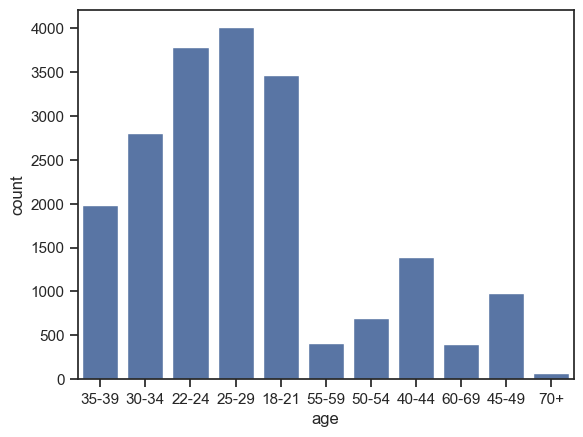

In [49]:
# Default seaborn output with two arguments; unsorted, confusing.
sns.countplot(x="age", data=copy_df);

### Change order of x-axis

In [50]:
# The plot by default takes the order of appearance of each value in the data.
copy_df.age.unique()

array(['35-39', '30-34', '22-24', '25-29', '18-21', '55-59', '50-54',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

In [51]:
# This is an array, we need to convert it to a list.
type(copy_df.age.unique())

numpy.ndarray

In [52]:
# Create a list to use as argument.
sorted_age = copy_df.age.unique().tolist()
# Sort the list.
sorted_age = sorted(sorted_age)
sorted_age

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

### Assing a name to the plot. This is useful for parameterization.

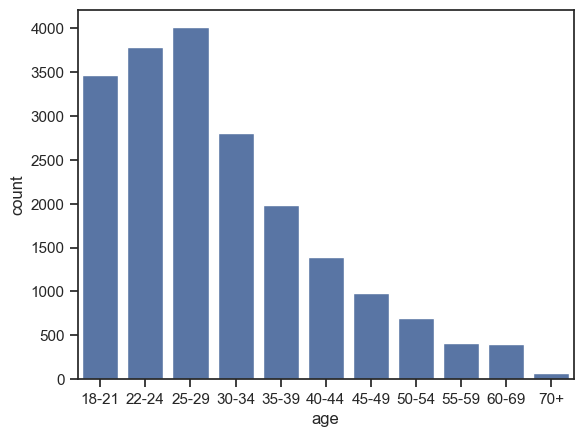

In [53]:
# Set the order of x-axis values:
# parameter of function is: order
# argument value of parameter is: sorted_age and should be of type list
by_age_plot = sns.countplot(
    x="age",
    data=copy_df,
    order=sorted_age
);

### Rotate x tick labels

C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\3898659214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  by_age_plot = sns.countplot(
C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\3898659214.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_age_plot.set_xticklabels(


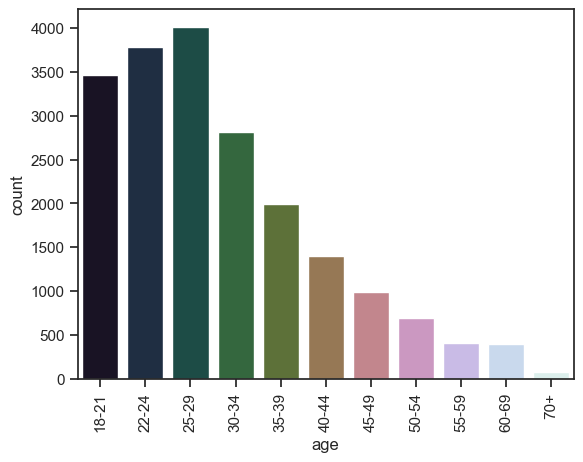

In [54]:
# use a name to assign new arguments to parameters, to modify the default ones.
by_age_plot = sns.countplot(
    x="age", 
    data=copy_df, 
    order=sorted_age, 
    palette="cubehelix"
);

by_age_plot.set_xticklabels(
    by_age_plot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center'
);


### Remove axes lines and modify axes labels

C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\2405980802.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_age_plot.set_xticklabels(


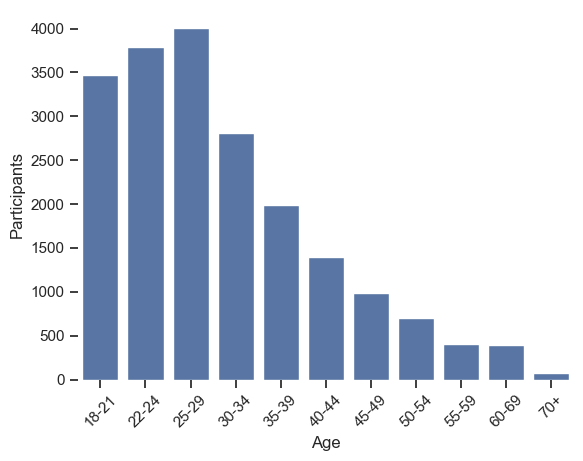

In [55]:
by_age_plot = sns.countplot(
    x="age", 
    data=copy_df, 
    order=sorted_age
);  # argument is a list

by_age_plot.set_xticklabels(
    by_age_plot.get_xticklabels(),
    rotation=45, 
    horizontalalignment='center'
);

# remove frame lines around the plot.
sns.despine(bottom=True, left=True)  # top and right are removed by default with despine()

# modify x axis and y axis labels
by_age_plot.set(
    xlabel="Age",
    ylabel="Participants"
);

### Remove ticks

C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\2004681502.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_age_plot.set_xticklabels(


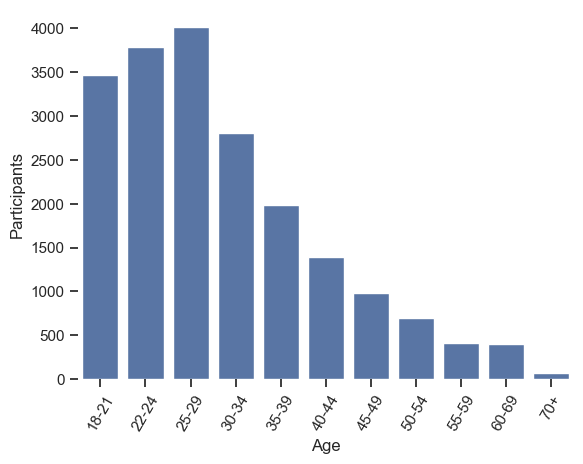

In [56]:
# Remove ticks using seaborn method. "Ticks" is not the same as "tick labels".

by_age_plot = sns.countplot(
    x="age",
    data=copy_df, 
    order=sorted_age
);  # argument is a list

by_age_plot.set_xticklabels(
    by_age_plot.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='center'
);

# modify x axis and y axis labels
by_age_plot.set(
    xlabel="Age",
    ylabel="Participants"
);

sns.despine(bottom=True, left=True)

# Be careful: ticks and tick labels are not the same objects.
# seaborn method to remove x and y axis ticks
sns.set_style({'xtick.bottom': False, 'ytick.left': False})

C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\2252521149.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_age_plot.set_xticklabels(


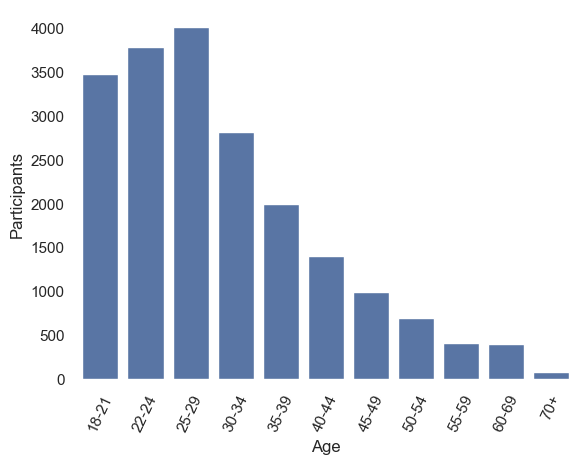

In [57]:
# Remove ticks, alternative matplotlib method that sets new default values.

by_age_plot = sns.countplot(
    x="age",
    data=copy_df,
    order=sorted_age
);  # argument is a list

# Update xtick labels
by_age_plot.set_xticklabels(
    by_age_plot.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='center'
);

# Update axis labels
by_age_plot.set(xlabel="Age", ylabel="Participants");
# by_age_plot.yaxis.set_visible(False)
# by_age_plot.set(xticks=[])

sns.despine(bottom=True, left=True)

# similar matplotlib method to modify x axis ticks.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # set ticks along the bottom edge to off
    top=False,         # set ticks along the top edge to off
    labelbottom=True   # show ticks labels at the bottom 
)  

### Configure figure size, background, colour. Which lines do the trick?

In [58]:
# Show which is palette seaborn uses by default.
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\1141372459.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  by_age_plot = sns.countplot(
C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\1141372459.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_age_plot.set_xticklabels(
C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\1141372459.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_age_plot.set_yticklabels(


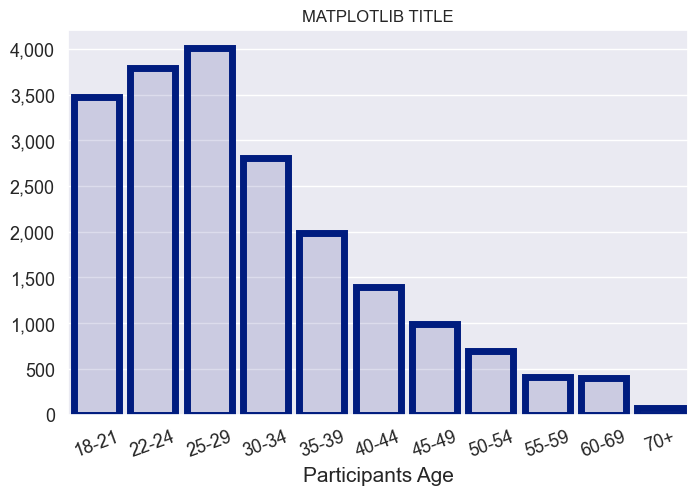

In [59]:
# ignore the warning for the class. Understand the warning for the future

plt.figure(figsize=(8, 5));

sns.set_style(
    "darkgrid",
    {'xtick.bottom': False, 'ytick.left': False}
);


sns.despine(bottom=True, left=True);

# Create plot object
by_age_plot = sns.countplot(
    x="age",
    data=copy_df,
    order=sorted_age,
    facecolor=(0.10, 0.10, 0.5, 0.15),  # RGBA combination codes (Red, Green, Blue. Opaqueness is the opposite of transparency)
    palette="muted",
    linewidth=5,
    edgecolor=sns.color_palette("dark", 11)
);

# set title using seaborn
by_age_plot.set_title("SEABORN TITLE")

# set title using matplotib. The last setting is used in the plot. The previous is overwritten
plt.title("MATPLOTLIB TITLE")

by_age_plot.set_xticklabels(
    by_age_plot.get_xticklabels(),
    rotation=20,
    horizontalalignment='center',
    size=13
);

by_age_plot.set_yticklabels(
    by_age_plot.get_yticks(), 
    size=13, rotation=0
); # ignore the warning for now
# by_age_plot.set_yticklabels(by_age_plot.get_yticks(),size=12);

# Put import always at start of code, here only for this lecture.
from matplotlib.ticker import StrMethodFormatter 
# No decimal places, use comma to separate thousands
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 

# modify x axis and y axis labels
# by_age_plot.set(xlabel="Age", ylabel="Participants");
by_age_plot.set_xlabel(
    xlabel="Participants Age",
    fontsize=15,
    rotation=0
);

by_age_plot.set_ylabel(
    ylabel="",
    fontsize=15); #rotation=0

### In class exercise, do it in 5 minutes (only for hackers).
Change color pallette to countplot. 
**Hint:** the correct method is to "google" it.

### Histplot. Read docstring "Notes".
* bins: range, width.   
Did you notice that the bins in data and in above graphs above are of unequal length?  
[histplot function parameters and examples](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [60]:
# sns.histplot?

In [61]:
## Select a subset for faster plot for the lecture.
uk_df = copy_df[copy_df["country"] == "UK"]

In [62]:
uk_df.duration.describe()  
# uk_df["duration"].describe()

count       489.000000
mean      10703.654397
std       75195.136840
min          39.000000
25%         424.000000
50%         607.000000
75%         922.000000
max      844967.000000
Name: duration, dtype: float64

In [63]:
## divide all values of a column.
# uk_df["duration"] = uk_df["duration"]/60  # or use: uk_df["duration"].div(60)

In [64]:
# Create a new column to convert duration to minutes.
uk_df["duration_minutes"] = uk_df["duration"]/60  # ignore the warning for the class, Mind the future.

C:\Users\ppapa\AppData\Local\Temp\ipykernel_29028\3164624719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df["duration_minutes"] = uk_df["duration"]/60  # ignore the warning for the class, Mind the future.


In [65]:
uk_df.head(3)

,duration,age,gender,country,education,role,prog_xp,salary,duration_minutes
103,1683,50-54,Man,UK,Bachelor’s degree,Data Analyst,10-20 years,"90,000-99,999",28.050000
176,518,50-54,Man,UK,Doctoral degree,Other,10-20 years,"40,000-49,999",8.633333
210,7688,18-21,Man,UK,Master’s degree,Student,3-5 years,NaN,128.133333


In [66]:
uk_df.sort_values("duration")

,duration,age,gender,country,education,role,prog_xp,salary,duration_minutes
2222,39,50-54,Man,UK,Master’s degree,NaN,NaN,NaN,0.650000
5541,40,22-24,Man,UK,NaN,NaN,NaN,NaN,0.666667
6956,42,25-29,Man,UK,Bachelor’s degree,NaN,NaN,NaN,0.700000
3615,59,30-34,Man,UK,Master’s degree,Other,< 1 years,NaN,0.983333
2288,60,40-44,Man,UK,NaN,NaN,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...
5889,214410,35-39,Woman,UK,Doctoral degree,Research Scientist,I have never written code,"60,000-69,999",3573.500000
9611,771242,30-34,Man,UK,Doctoral degree,Data Scientist,5-10 years,"60,000-69,999",12854.033333
16421,782374,35-39,Man,UK,Master’s degree,Data Scientist,5-10 years,"125,000-149,999",13039.566667
9832,827691,40-44,Woman,UK,Master’s degree,Software Engineer,5-10 years,$0-999,13794.850000


### Default output.

In [67]:
# uk_df.duration = uk_df["duration"]/60  # uk_df.loc[:,"duration"] = uk_df.loc[:,"duration"]/60
# uk_df.duration.describe()  

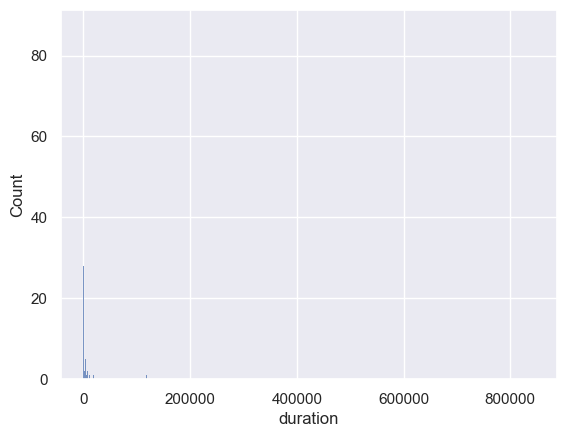

In [68]:
# Default output is ugly because the bin range defaults to extremes and data is full of extreme values.
# Example is in seconds.
sns.histplot(
    x="duration",
    data=uk_df
);

### Modify x axis values range.

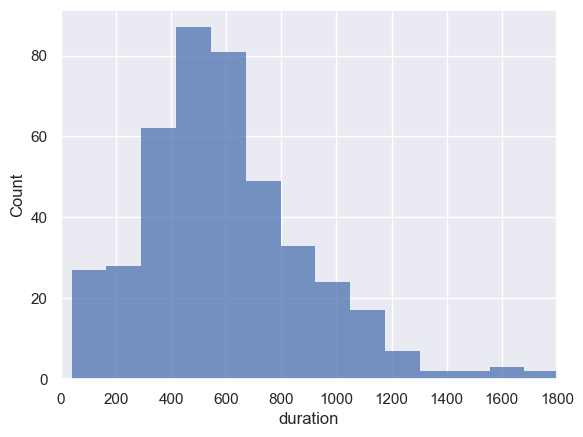

In [69]:
# show only from 0 to 1200. Example in seconds.
sns.histplot(x="duration", data=uk_df)
plt.xlim(0, 1800);

### Modify size, binwidth, color, edgecolor, edge line, labels.

In [70]:
# show seaborn style
# sns.axes_style?
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

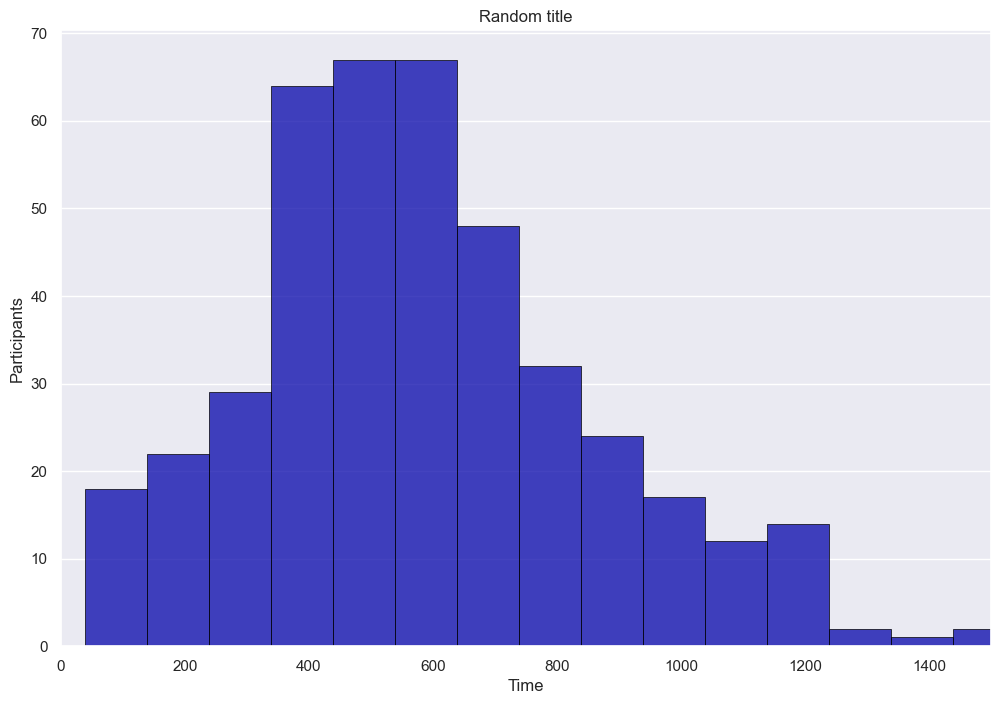

In [71]:
### syntax without naming the plot => chain syntax
# Show only from 0 to 1500 and set binwidth as 100. Example in seconds.
plt.figure(figsize=(12,8))

sns.set_style("darkgrid", {'xtick.bottom': False, 'ytick.left': False})

sns.histplot(
    x="duration", 
    data=uk_df, 
    binwidth=100,
    color='#0504AA',
    edgecolor="black",
    linewidth=0.5
).set(xlabel="Time", ylabel="Participants");

plt.xlim(0, 1500);

# hide horizontal grid lines
plt.grid(visible=False, axis="x")  # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.grid.html

plt.title("Random title");  # I used the matplotlib method  

# Uncomment a line below to save the figure.
# plt.savefig("duration_histplot.jpg")
# plt.savefig("duration_histplot.png")  # Output format matters.

### In class exercise, do it in 5 minutes (only for hackers).
Add to the histplot:  
* a) a title and    
* b) a legend.  

**Hint:** The correct method is to "google it".  
**Hint 2:** Do one thing at a time.

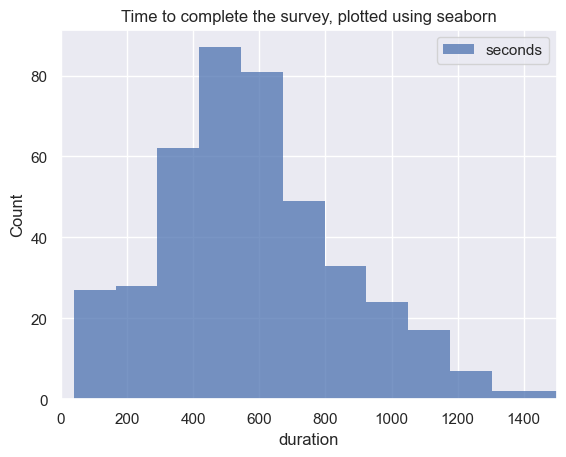

In [72]:
sns.histplot(
    x="duration",
    data=uk_df,
    label="seconds"
).set_title('Time to complete the survey, plotted using seaborn')  # I used the seaborn method

plt.legend()

plt.xlim(0, 1500);

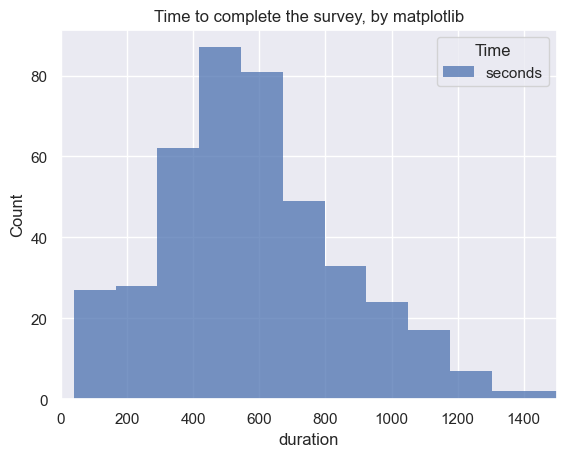

In [73]:
sns.histplot(x="duration", data=uk_df)
plt.title('Time to complete the survey, by matplotlib')  # I uses matplotlib method for title.
plt.legend(title='Time', loc='upper right', labels=['seconds'])  # Use matplotlib for legend.
plt.xlim(0, 1500);

### Resources for the data set.
[kaggle competition](https://www.kaggle.com/c/kaggle-survey-2020)

[Submission at the kaggle competition](https://www.kaggle.com/pmav99/spam-identification-and-data-scientists-profile)

[Github link with the notebook code for the kaggle competition](https://github.com/thanarg1979/dsml_survey_20)

## 6. Assignment:  Use the Matplotlib tutorial to create two subplots, by degree and gender, based on the % of women in 2011.

 
 
[Link to old docs, bachelor degrees by gender](https://matplotlib.org/3.1.0/gallery/showcase/bachelors_degrees_by_gender.html)  

First plot: All degrees where women are >50%.  
Second plot: All degrees where women are <=50%.    
Grades: minus two points (-2) for anyone that does it. 

This is the old link that goes to a new example: [Bachelor degrees by gender => stock prices](https://matplotlib.org/stable/gallery/showcase/bachelors_degrees_by_gender.html?highlight=degree%20gender)   
Conclusion: "Everything changes".


<u>Hints:</u>  
Write pseudocode first.  
Combine pandas and matplotlib.  
Use pandas to read the file as dataframe.  
 
Filter year 2011 according to the conditions to find the columns.  
Split the data in two dataframes using columns.  
Plot using the proper method.

### Extra: The ugliest plots online, guess [by who.](https://www.ggb.gr/el/expost_evaluations_ggb_espa_programmes)  Scroll down and open the links.   


### Extra: Interactive Dashboards with plots: [Run4more live charity dashboard](https://www.r4m.live:8505/)